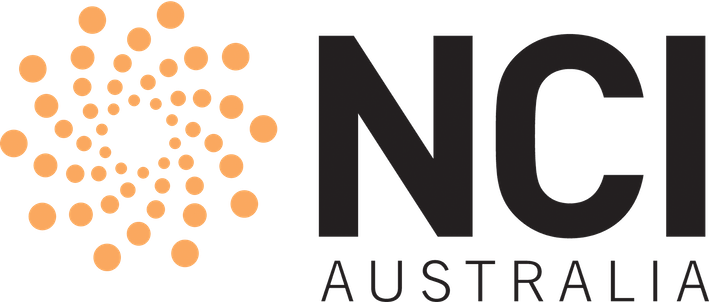

## Australian Temperature and Precipitation Change in CMIP6 SenarioMIP

In this notebook: we are going to investigate whether 

    - Use xarray to open CMIP6 data from NCI

    - Extract useful variables

    - Calculate yearly average data

    - Plot the temperature and precipitation change in Australia under two different future senarios (the lowest one and highest one)

    - Compare the temperature and precipitation difference between the two senarios

The following material uses Coupled Model Intercomparison Project (CMIP6) collections. The CMIP6 terms of use are found here https://pcmdi.llnl.gov/CMIP6/TermsOfUse/TermsOfUse6-1.html. 
For more information on the collection, please click here https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f6600_2266_8675_3563.

In [23]:
!pwd

/home/561/yli561/pangeo


Note: In Jupyter Notebook you can execute Terminal commands in the notebook cells by prepending an exclamation point/bang(!) to the beginning of the command. This can be useful for many things such as getting information without having to open a Terminal/Command Prompt, or installing a conda package you are trying to use.

!pwd shows the current path of jupyter notebook is /home/561/yli561/pangeo

### Load Library

In [24]:
import xarray as xr

In [25]:
%matplotlib inline

We use the above command in order to show plots inside python jupyer notebook.

### CMIP6 attributes


In order to find the data path, we can also use CleF to search the data path. 

```
clef cmip6 --activity ScenarioMIP \
           --table Amon \
           --grid gr \
           --variable tas \
           --variable pr
```

For detailed information about using 'clef', check out this webpage: https://clef.readthedocs.io/en/latest/gettingstarted.html


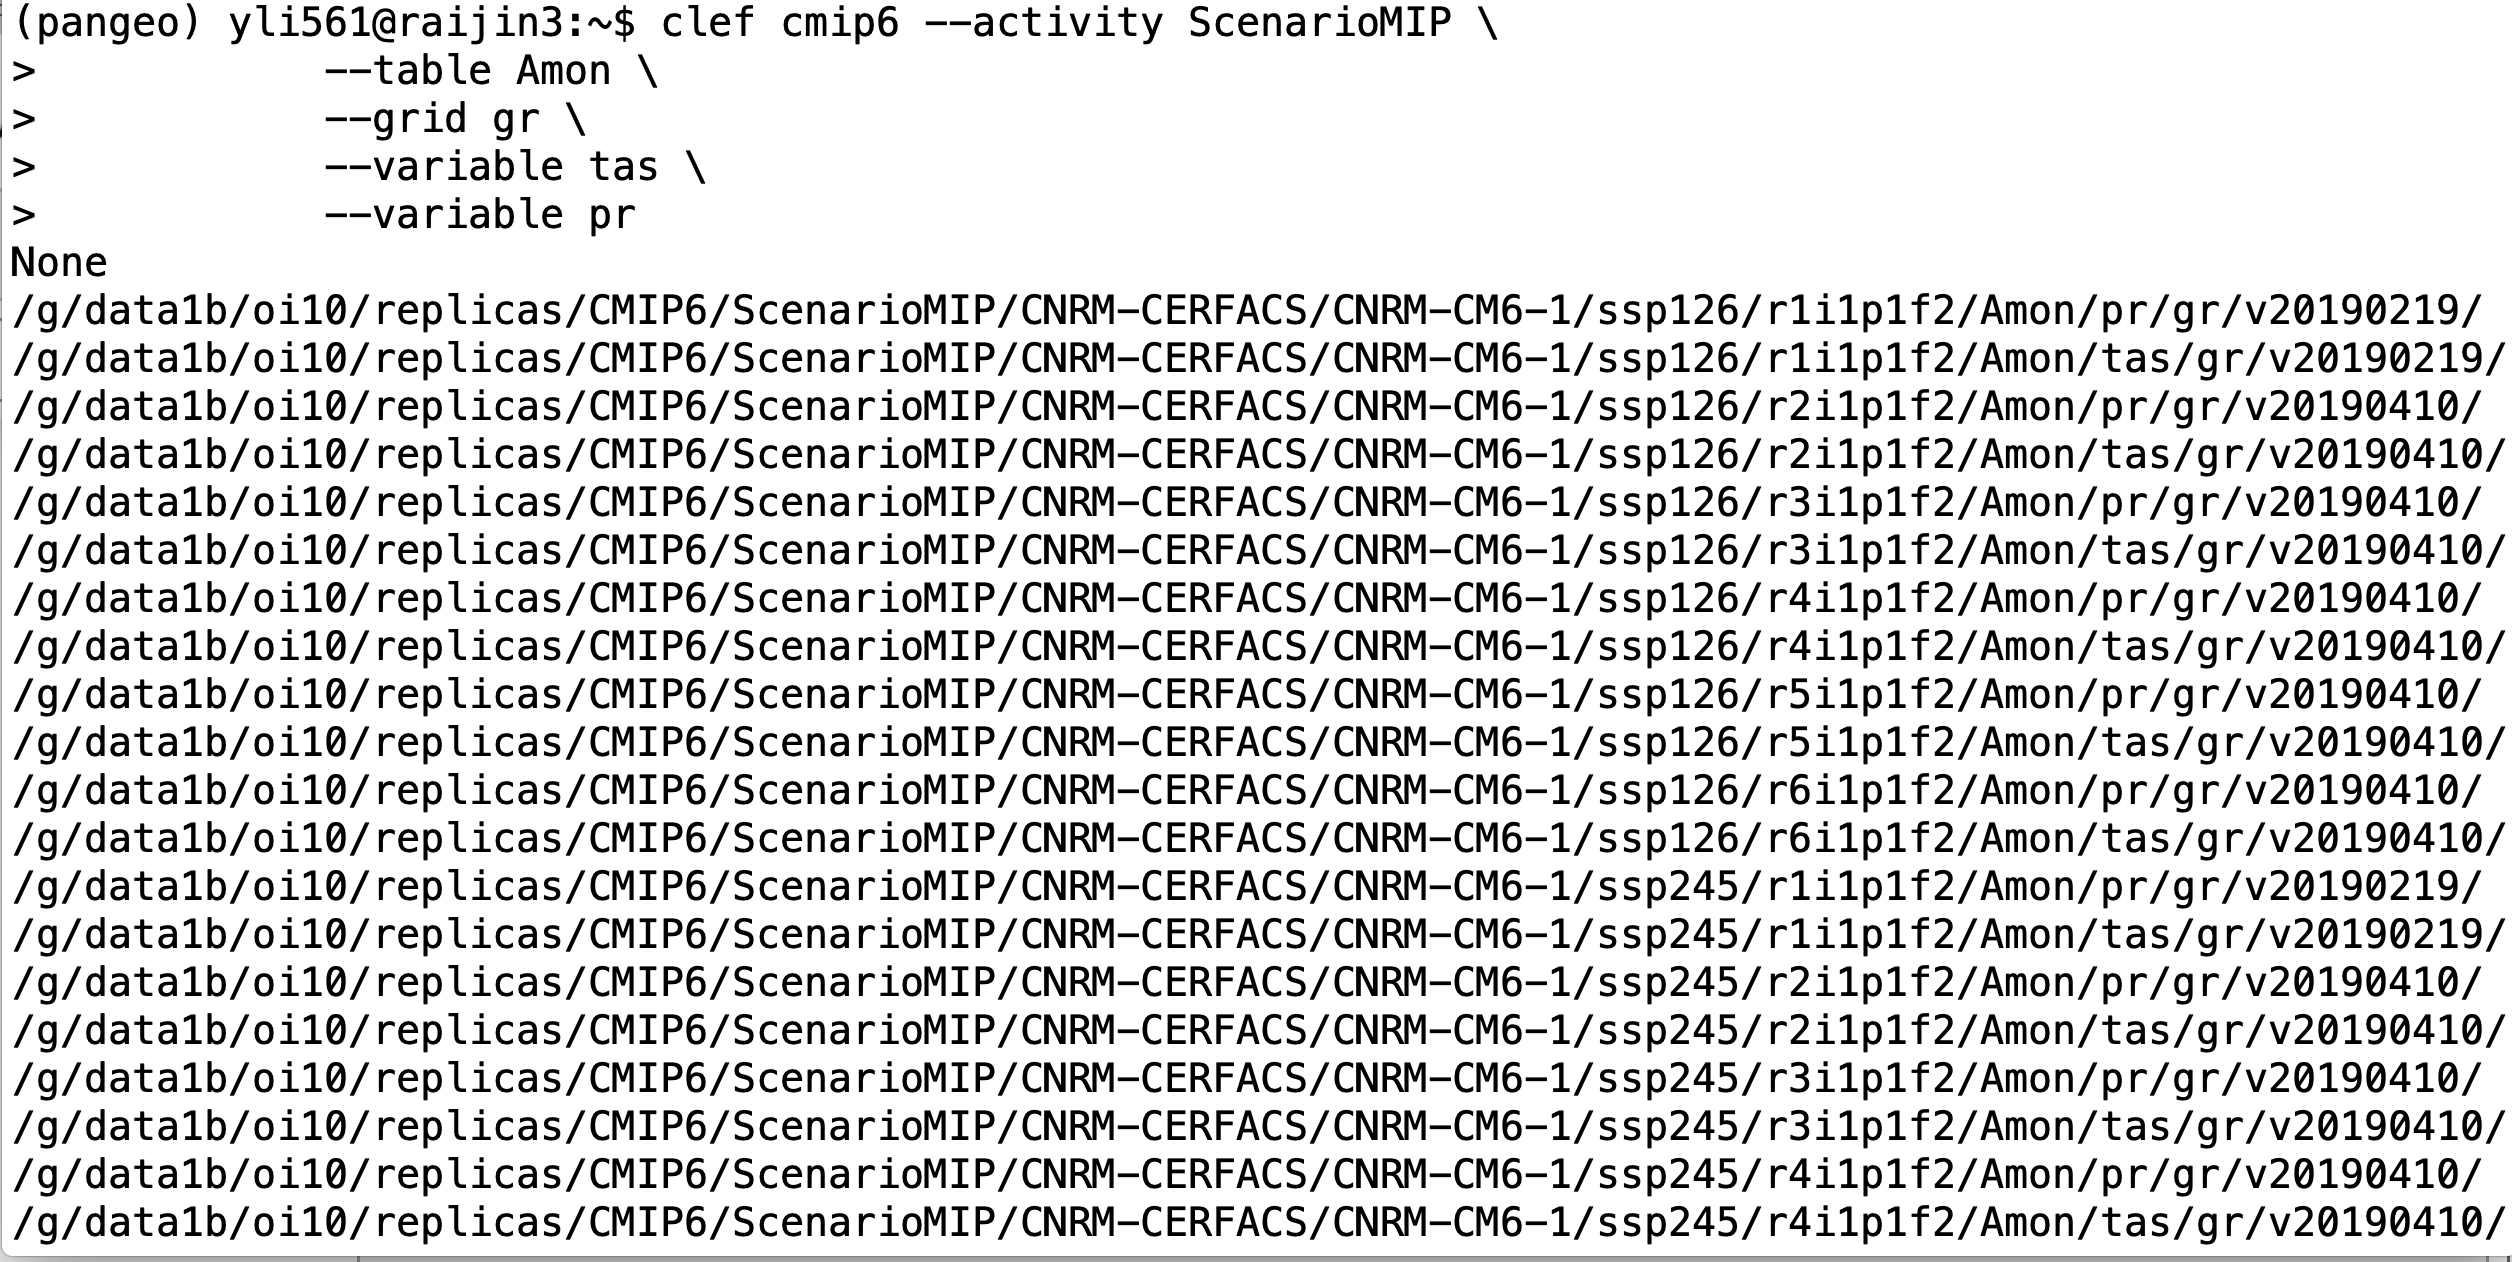

We can then set up values for CMIP6 attributions according to the CleF search results.

CMIP6 data are organised according to its global attributes. We can access different data by changing these attributes:
Activity, Institute, Source, Experiment, Member, Table, Variable, Grid, Version.

There are four future senarios in SenarioMIP: ssp126, ssp245, ssp370 and ssp585. 
For information about SenarioMIP senarios, see here https://www.geosci-model-dev.net/9/3461/2016/ 

Below, we have set up these attributes in oreder to get the future projection data under the ssp126 and ssp585 senarios using member 'r1i1p1f2' of CNRM_CM6-1 model simulations as an example. 

### define CMIP data searching creterio



In [26]:
Cmip6Dir='/g/data1b/oi10/replicas/CMIP6'
Activity='ScenarioMIP'
Institute='CNRM-CERFACS'
Source='CNRM-CM6-1'
Experiment='' #leave it blank for later assignment
Member='r1i1p1f2'
Table='Amon'
Var=''  #leave it blank for later assignment
Grid='gr'
Version='v20190219'
Period='201501-210012'

### Australian temperature change under the lowest emission senarios

Use xarray to open the temeprature data (tas) of the lowest emission senario (ssp126)

In [27]:
Var='tas'
Experiment='ssp126'
ds=xr.open_dataset(''+Cmip6Dir+'/'+Activity+'/'+Institute+'/'+Source+'/'+Experiment+'/'+Member+'/'+Table+'/'+Var+'/'+Grid+'/'+Version+'/'+Var+'_'+Table+'_'+Source+'_'+Experiment+'_'+Member+'_'+Grid+'_'+Period+'.nc')

Extract temperature 'tas' data

In [28]:
tas_126=ds.tas

Calculate reginal mean of Australia (lon: 115E-155E, lat: 45S-15S), and then calculate the yearly average of the monthly data.

In [29]:
tas_126_yr=tas_126.sel(lon=slice(115,155),lat=slice(-45,-15)).mean(dim=('lat','lon')).resample(time='Y').mean(dim='time')

Plot the yearly temperature change during the time period 2019-2060

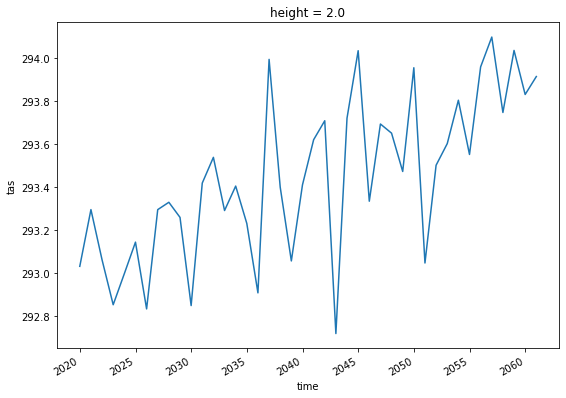

In [30]:
tas_126_yr.sel(time=slice('2019','2060')).plot(size=6)

### Australian temperature change under the highest emisiion senario

Similarly as above, the yearly temperature change under the higheset emission senario (ssp585) during the time period 2019-2060 is below

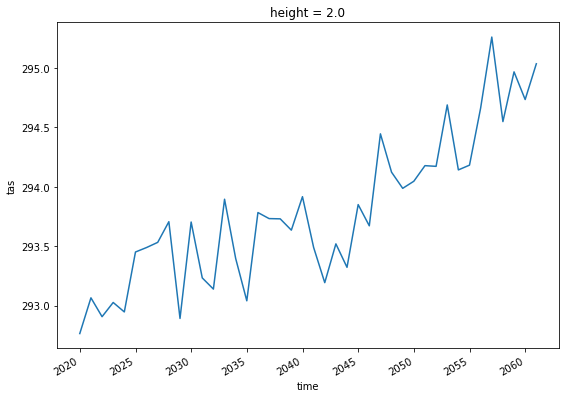

In [31]:
Experiment='ssp585'
ds=xr.open_dataset(''+Cmip6Dir+'/'+Activity+'/'+Institute+'/'+Source+'/'+Experiment+'/'+Member+'/'+Table+'/'+Var+'/'+Grid+'/'+Version+'/'+Var+'_'+Table+'_'+Source+'_'+Experiment+'_'+Member+'_'+Grid+'_201501-210012.nc')
tas_585=ds.tas
tas_585_yr=tas_585.sel(lon=slice(115,155),lat=slice(-45,-15)).mean(dim=('lat','lon')).resample(time='Y').mean(dim='time')
tas_585_yr.sel(time=slice('2019','2060')).plot(size=6)

### The difference of temperature change between the two emission senarios

The average temperature change differnce between the lowest and highest emission senario from 2019 to 2060:

In [32]:
TasDif=tas_585_yr.mean(dim='time')-tas_126_yr.mean(dim='time')
print(TasDif)

<xarray.DataArray 'tas' ()>
array(1.4142151, dtype=float32)
Coordinates:
    height   float64 2.0


The above result shows that Australian temperature would have an additional 1.41 Celsius average warming in our lifetime span (2019-2060) under the highest emission senario compared with the lowest emission senario!

### How about the precipitation change under the lowest emission senario?

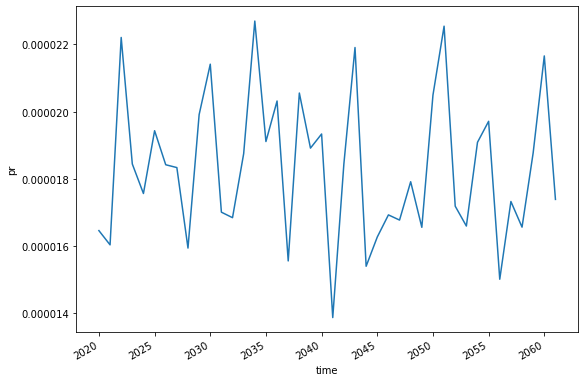

In [33]:
Var='pr'
Experiment='ssp126'
ds=xr.open_dataset(''+Cmip6Dir+'/'+Activity+'/'+Institute+'/'+Source+'/'+Experiment+'/'+Member+'/'+Table+'/'+Var+'/'+Grid+'/'+Version+'/'+Var+'_'+Table+'_'+Source+'_'+Experiment+'_'+Member+'_'+Grid+'_201501-210012.nc')
pr_126=ds.pr
pr_126_yr=pr_126.sel(lon=slice(115,155),lat=slice(-45,-15)).mean(dim=('lat','lon')).resample(time='Y').mean(dim='time')
pr_126_yr.sel(time=slice('2019','2060')).plot(size=6)

### Australian precipitation change under the highest emission senario

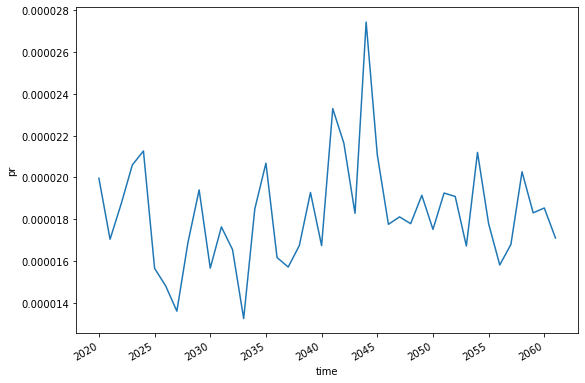

In [34]:
Var='pr'
Experiment='ssp585'
ds=xr.open_dataset(''+Cmip6Dir+'/'+Activity+'/'+Institute+'/'+Source+'/'+Experiment+'/'+Member+'/'+Table+'/'+Var+'/'+Grid+'/'+Version+'/'+Var+'_'+Table+'_'+Source+'_'+Experiment+'_'+Member+'_'+Grid+'_201501-210012.nc')
pr_585=ds.pr
pr_585_yr=pr_585.sel(lon=slice(115,155),lat=slice(-45,-15)).mean(dim=('lat','lon')).resample(time='Y').mean(dim='time')
pr_585_yr.sel(time=slice('2019','2060')).plot(size=6)

### The difference of precipitation change between the two emission senarios

In [35]:
PrDif=(pr_585_yr.mean(dim='time')-pr_126_yr.mean(dim='time'))/pr_126_yr.mean(dim='time')
print(PrDif)

<xarray.DataArray 'pr' ()>
array(-0.02813326, dtype=float32)


This shows that on average Australia is becoming drier under a higher emission senario.